In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from kohonen import Kohonen

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(10, 10))
plt.rc('figure', facecolor=(1,1,1,1))

In [76]:
 #loading data
dataset = pd.read_csv('europe.csv')

#le sacamos el nombre de los paises
countries = dataset.iloc[:,0]
variable_names = dataset.iloc[:,1:].columns
variables = dataset.iloc[:, 1:].values



standarized = (variables - variables.mean(axis=0))/variables.std(axis=0)

network = Kohonen(standarized, seed=17, k = 2)

In [77]:
def plot_u_matrix(network, dataset):
    n_distances = np.zeros((network.k, network.k))
    
    for i in range(network.k):
        for j in range(network.k):
            row = list(filter(lambda x: x >= 0 and x < network.k, [i-1,i+1]))
            col = list(filter(lambda x: x >= 0 and x < network.k, [j-1,j+1]))
            neigborhood = np.linalg.norm([network.weights[i,j] for j in col] + [network.weights[i,j] for i in row] - network.weights[i,j], axis=1) 
            distance =np.sum(neigborhood)/len(neigborhood)
            plt.text(i+0.5, j+0.5, round(distance,3), ha='center', va='center',  bbox = dict(facecolor = 'white', alpha = 0.5))
            n_distances[j,i] += distance

    plt.pcolormesh(n_distances, cmap="Greys")
    plt.colorbar()


In [78]:
def plot_countries(network, countries_name, dataset):
    strings = [["" for i in range(network.k)] for i in range(network.k)]
    for country, row in zip(countries_name, dataset):
        (i,j), distances  = network.predict(row)
        strings[i][j] += country + "\n"

    for i in range(network.k):
        for j in range(network.k):
            plt.text(j+0.5, i+0.5, strings[i][j], ha='center', va='center',  bbox = dict(facecolor = 'white', alpha = 0.5))
    
    plt.ylim(0, network.k)
    plt.xlim(0, network.k)


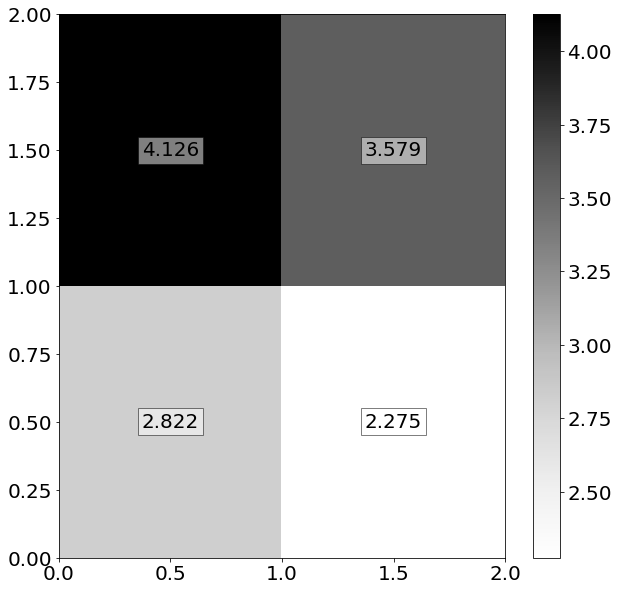

In [79]:
plt.figure("U matrix before training")
plot_u_matrix(network, standarized)

In [80]:
network.train(epochs=2500)


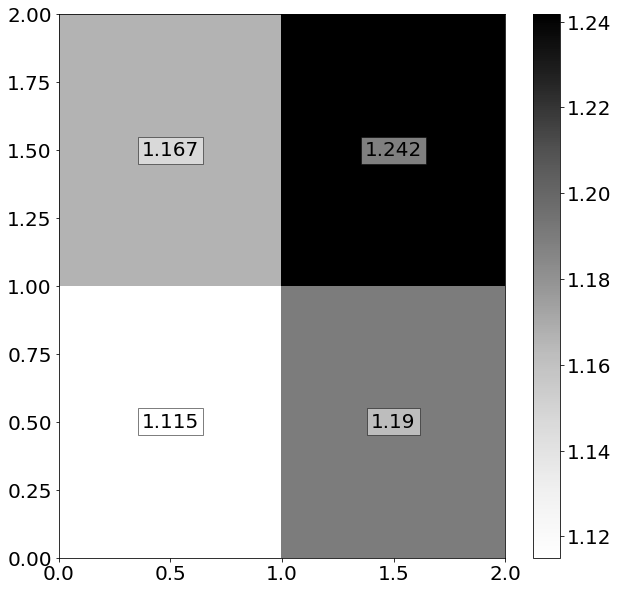

In [81]:
plt.figure("U matrix after training")
plot_u_matrix(network, standarized)

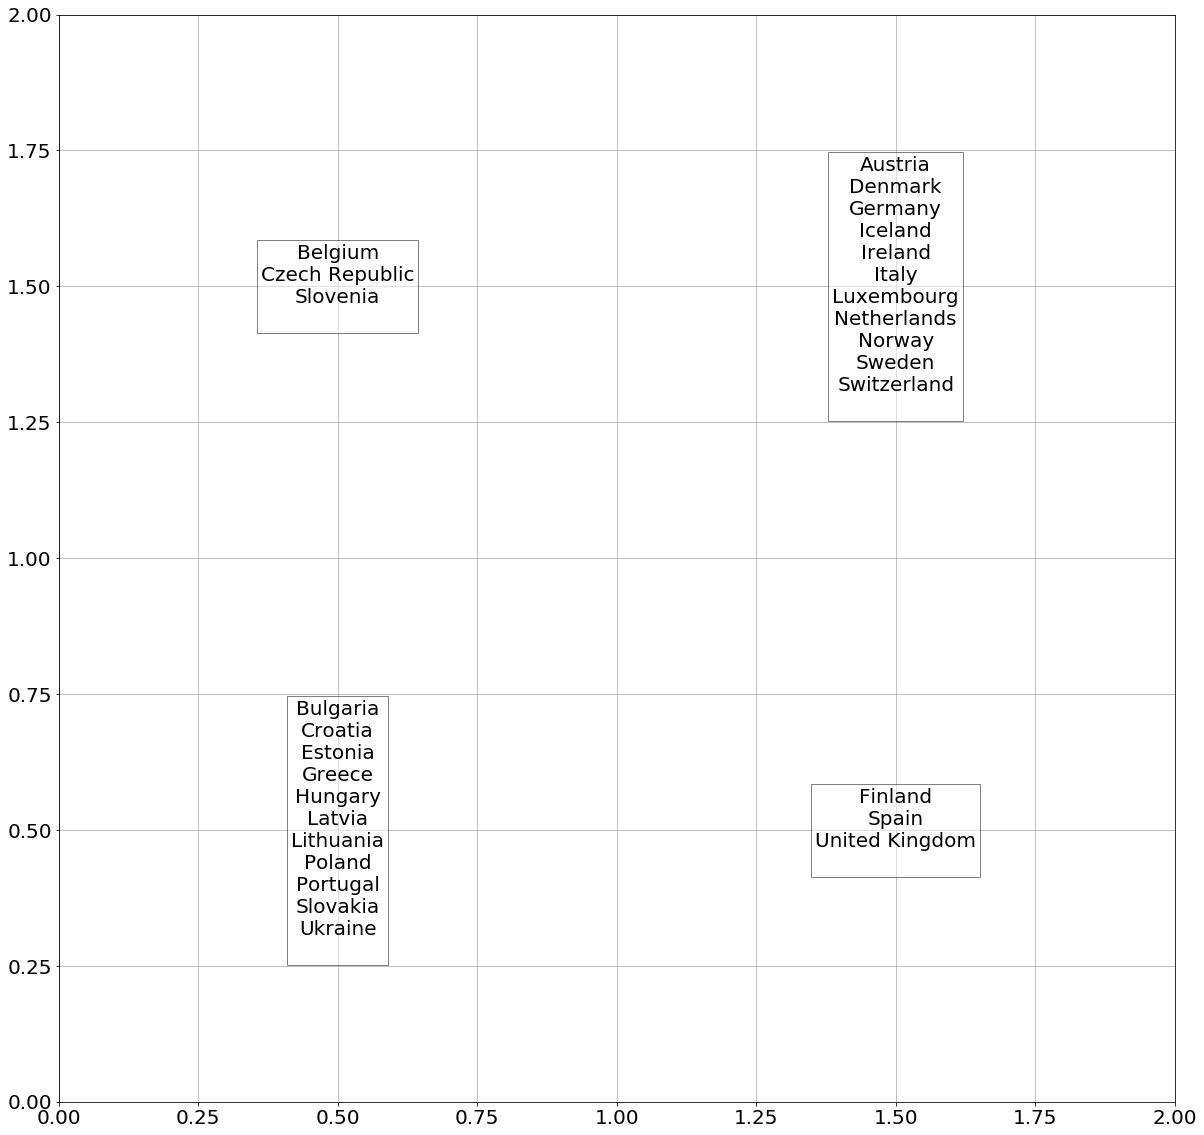

In [82]:
plt.figure("Countries cluster", figsize=(20,20))
plot_countries(network, countries, standarized)
plt.grid()